conda activate mlexample_env

- Both below must be in the same path

which jupyter

which jupyter-notebook

- Then if they are not use:

conda install notebook




# Machine Learning by Example (2020)

"*In traditional programming, the computer follows a set of predefined rules to
process the input data and produce the outcome. In machine learning, the computer
tries to mimic human thinking.*"

## Tasks can be classified into:

1) Unsupervised Learning: Data used for learning has indicative signals but no description. Ex: Anomalies detection;

2) Supervised Learning: Goal is to find a function mapping inputs to output, so in this sense data comes with description, targets or desired output. Ex: Sales forecasting;

3) Reinforcement Learning: System can adapt to certain dynamic conditions with data providing feedbacks. There is a goal in the end and the system understands its perfomance, adjusting accordingly. Ex: Self-driven cars;


## Overfitting, underfitting, and the bias-variance trade-off

Concepts recap:

**Bias**: 

-> Error from incorrect assumptions in learning algorithm:

\begin{align}
Bias[ \hat y ] = E[\hat y - y ]
\end{align}

**Variance**: 

-> Sensitivity of the model regarding variations in dataset:

\begin{align}
Variance = E[ \hat y^2 ] - E[\hat y]^2
\end{align}

**Mean Squared Error (MSE)**:

-> A measure for the error of estimation

\begin{align}
MSE = E[(y(x) - \hat y (x))^2]
\end{align}


**Overfitting**: The model is fitting the training set extremely well, but it is not good for predictions, in this sense, it does not have "external validity".
    
- Its bias is low, but variance is high, since predictions tend to have large variability;
    
**Underfitting**: The model perfoms badly in training and test sets.

- Its bias is high, variance potentially low (in case our model is extremely simple, think about a straight horizontal line as prediction);
    
**Bias-variance trade-off**

More data and complex models tend to reduce bias, however there will be more shifts in the model to better fit the data, increasing variance.

\begin{align}
MSE & = E[(y - \hat y)^2]\\
& = E \left[(y-E[\hat y] + E[\hat y] - \hat y)^2\right]\\
& = E \left[(y-E[\hat y])^2 \right] + E\left[(E[\hat y] - \hat y)^2\right] + E\left[2\left(y-E[\hat y]\right)\left(E[\hat y] - \hat y\right)\right]\\
& = E \left[(y-E[\hat y])^2 \right] + E\left[(E[\hat y] - \hat y)^2\right] + 2\left(y-E[\hat y]\right)\left(E[\hat y] - E[\hat y]\right)\\
& = \left(E[\hat y - y]\right)^2 + E[\hat y^2] - E[\hat y ]^2\\
& = \underbrace{Bias[ \hat y ]^2}_{\text{Error of estimations}} + \underbrace{Variance[ \hat y ]}_{\hat y \text{ movement around its mean}}
\end{align}
    
**Cross-validation**

Cross-validation helps in avoiding overfitting, such that the training set is split into training and validation set. 

It can be: (1) **exhaustive**: When all possible partitions are tested (e.g. Leave-One-Out-Cross_Validation - LOOCV); (2) **Non-exhaustive**: Not all possible partitions are used (e.g. k-fold cross validation - set is split in k equal-size folds leaving one out for test in each of the k rounds);



## Chapter 2: Building a Movie Recommendation Engine with Naive Bayes

- Movie recommendation is a classification problem.

- Generally speaking classification maps observations/features/predictive variables to target categories/labels/classes.


### Binary Classification

- Classify observations in one of two possible classes (e.g. spam detection, click-thorugh for online ads, whether a person likes or not a movie).

### Multiclass Classification

- Classify observations in more than two possible classes (e.g. handwritten digit recognition as number 9, 2, etc).

### Multi-label Classification

- An observation can belong to more than one class (e.g. a movie can be classified as adventure, sci-fi).

- Typical approach to solve is divide it in a set of binary problem classification.


### Exploring Naive Bayes

- Probabilistic classifier

#### Recall Bayes' Theorem

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

E.g. If I have a unfair coin (U) and a fair one (F), such that in the first one the probability of head is 90% (P(H|U)=90%). Given that we got head, what it the probability that an unfair coin was picked?

Answer: $$P(U|H) = \frac{P(H|U)P(U)}{P(H)} = \frac{P(H|U)P(U)}{P(H|U)P(U) + P(H|F)P(F)} = \frac{0.9*0.5}{0.9*0.5+0.5*0.5} = 0.64$$

#### The mecanics of Naive Bayes

Consider:

Let $k \in \{1,2,...,K\}$ denote classes, the probability that a sample belong to class $k$ given observed $x$ is: 

$$P(y_k|x) = \frac{P(x|y_k)P(y_k)}{P(x)}$$

The names given for the components of the equation above are:

- **Prior**: $P(y_k)$ - How classes are distributed, without any knowledge of features;

- **Posterior**: $P(y_k|x)$ - Incorporates knowledge from observation;

- **Likelihood** - $P(x|y_k)$ - The distribution of n features given that the sample belong to class $y_k$. 
Likelihood ends up being very hard to calculate when there are a large number of features, since this become a large joint distribution.
To circumvent this issue, Naive Bayes assumes feature independence, which allow us to write:

$$P(x|y_k) = P(x_1|y_k)*P(x_2|y_k)*...*P(x_n|y_k)$$

The denominator of our bayes formula, $P(x)$ (called **evidence**) depends on overall distribution of features, meaning that it acts a constant, 
and so our posterior is proportional to:

$$ P(y_k|x) \propto P(x|y_k)P(y_k) = P(x_1|y_k)*P(x_2|y_k)*...*P(x_n|y_k) $$

Note that it is possible that, for a given sample, a given feature, say $n'$ presents: $P(x_{n'}|y_k) = 0$, which would cause the likelihood to be zero, 
and so an unknown likelihood. To avoid that, **Laplace Smoothing** is used:

$$ P(x_{n'}|y_k) = \frac{N_{x_{n'}|y_k} + \alpha}{N_{y_k}+ \alpha d}$$

Where $N_{x_{n'}|y_k}$ is how many times $x_{n'}$ occured given that $y_k$ was observed, $N_{y_k}$ how many times $y_k$ was observed, $\alpha>0$ is the smoothing parameter ($\alpha=0$ means no 
smoothing, many times this is set to 1) and $d$ in the binary case is 2 (because there are two possible values).

Knowing the likelihoods and given some prior, one can calculate the posteriors. Using the fact that the sum of posteriors for a given $x$ is 1, the probaility that
$y_k$ is observed given $x$ is found. 


### Implementing Naive Bayes

In [7]:
import numpy as np
# Building a toy dataset, which tries to discover if the user likes the target movie based on how she likes other three movies (like is YES or NO)
X_train = np.array([
    [0, 1, 1],
    [0, 0, 1],
    [0, 0, 0],
    [1, 1, 0]])
Y_train = ['Y', 'N', 'Y', 'Y']
X_test = np.array([[1, 1, 0]])    


In [8]:
# Group data by label ('Y' and 'N') recording their indices (where they show up) by classes

def get_label_indices(labels):
    """
    Group samples based on their labels and return indices
    @param labels: list of labels
    @return: dict, {class1: [indices], class2: [indices]}
    """
    from collections import defaultdict
    label_indices = defaultdict(list)
    for index, label in enumerate(labels):
        #print('index:',index)
        #print('label', label)
        label_indices[label].append(index)
    return label_indices

In [6]:
label_indices = get_label_indices(Y_train)
print('label_indices:\n', label_indices)

label_indices:
 defaultdict(<class 'list'>, {'Y': [0, 2, 3], 'N': [1]})


In [20]:
def get_prior(label_indices):
    """
    Compute prior based on training examples
    @param label_indices: grouped sample indices by class
    @return: dictionary, with class label as key, corresponding prior
             as the value
    """
    # define prior as an object that can be referred by label
    #  get the length of indices inside label_indices items
    prior = {label: len(indices) for label, indices in label_indices.items()}
    total_count = sum(prior.values())
    for label in prior:
        prior[label] /= total_count
    return prior

In [23]:
for label, indices in label_indices.items(): 
    print('index:',indices)
    print('label', label)

prior = get_prior(label_indices)
print('Prior:', prior)

index: [0, 2, 3]
label Y
index: [1]
label N
Prior: {'Y': 0.75, 'N': 0.25}


In [33]:
def get_likelihood(features,label_indices,smoothing = 0):
    """
    Compute likelihood based on training samples, using 
            Laplace approximation
    @param features: Matrix of features
    @param label_indices: Grouped sample indices by class
    @param smoothing: integer, additive smoothing parameter
    @return: dictionary, with class as keym corresponding 
             conditional probability P(feature|class) vector 
             as value
    """
    likelihood = {}
    for label, indices in label_indices.items():

        likelihood[label] = features[indices, :].sum(axis=0) + smoothing

        total_count = len(indices)

        likelihood[label] = likelihood[label]/(total_count + 2 * smoothing)
        
    return likelihood

In [35]:
# Setting smoothing = 1
smoothing = 1
likelihood = get_likelihood(X_train, label_indices, smoothing)
print('Likelihood:\n', likelihood)

Likelihood:
 {'Y': array([0.4, 0.6, 0.4]), 'N': array([0.33333333, 0.33333333, 0.66666667])}


In [38]:
def get_posterior(X, prior, likelihood):
    """
    Compute posteruor of testing samples, based on prior and likelihood
    @param X: testing samples
    @param prior: dictionary, with class label as key,
                  corresponding prior as the value
    @param likelihood: dictionary, with class label as key, 
                       corresponding conditional value as vector value
    @return: dictionary, with class label as key, posterior as value
    """
    posteriors = []
    for x in X:
        # posterior is proportional to prior * likelihood
        posterior = prior.copy()
        for label, likelihood_label in likelihood.items():
            for index, bool_value in enumerate (x):
                posterior[label] *= likelihood_label[index] if bool_value else (1 - likelihood_label[index])
        # normalize so that all sums up to 1
        sum_posterior = sum(posterior.values())
        for label in posterior:
            if posterior[label] == float('inf'):
                posterior[label] = 1.0
            else:
                posterior[label] /= sum_posterior
        posteriors.append(posterior.copy())
    return posteriors


In [41]:
# From our example
posterior = get_posterior(X_test,prior,likelihood)
print('Posterior:\n', posterior)

Posterior:
 [{'Y': 0.9210360075805433, 'N': 0.07896399241945673}]


Observe that everything we have done above is what Naive Bayes does and we have done it from the scratch.

Another possibility is to use *scikit-learn*

### Implementing Naive Bayes with scikit-learn

- We are going to use BernoulliNB module from scikit-learn


In [42]:
from sklearn.naive_bayes import BernoulliNB

ModuleNotFoundError: No module named 'sklearn'

In [45]:
# Initialize the model (alpha is the smoothing factor,
#   fit_prior = True means prior learned from the training set)
clf = BernoulliNB(alpha = 1.0, fit_prior=True)

# Train the classifier
clf.fit(X_train, Y_train)

# Predict probability results
pred_prob = clf.predict_proba(X_test)
print('[scikit-learn] Predicted probabilities:\n', pred_prob)

# Or you can also get directly the predicted class by the method
pred = clf.predict(X_test)
print('[scikit-learn] Prediction:', pred)

[scikit-learn] Predicted probabilities:
 [[0.07896399 0.92103601]]
[scikit-learn] Prediction: ['Y']


## Evaluating Classification Performance

To get more insights in the results, one can look not only to accuracy, but also to:

1) **Confusion Matrix** (confusion_matrix from sklearn.metrics)


|       |          | Predicted | Predicted|
|-------|----------|:---------:|:--------:|
|       |          | Negative  | Positive |
|**Actual**| Negative |    TN     |    FP    |
|**Actual**| Positive |    FN     |    TP    |

Where:

    - TN: True Negative
    
    - FP: False Positive

    - FN: False Negative

    - TP: True Positive

1.1) Precision: $\frac{TP}{TP + FP}$ - Fraction of positive cells measured correctly;

1.2) Recall (True positive rate): $\frac{TP}{TP + FN}$ - Fraction of positive cells correctly identified;

1.3) F1 score (harmonic mean): $f_1 = 2 * \frac{precision * recall}{precision + recall}$


These measures can be obtained using scikit-learn by:

`sklearn.metrics import precision_score, recall_score, f1_score`

or a summarization of all is given by:

`from sklearn.metrics import classification_report`



2) Area under the curve (AUC) of the receiver operating characteristic (ROC):

The distribution of True Positive and True Negative may overlap, if in some regions they do, then AUC is smaller than one. 
The closer the AUC is to one, the model is perfectly able to distinguish between positive class and negative class. 

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5





## Tuning models with cross-validation

We usually apply K-fold cross-validation. The idea of K-fold cross-validation is to divide the original dataset into *k* equal-sized subsets, which are retained as a testing set, the remaining k - 1 subsets are used to train model. Then the average performance across all k trials is calculated to generate overall result.

Also, cross-validation is used to adjust hyperparameters, boosting learning perfomance and reducing overfitting.




## Chapter 3: Recognizing Faces with Support Vector Machine (SVM)

## Finding Separating Boundary with SVM

- The whole idea here is to find an optimal hyperplane in order to divide an N-dimensional space of features;

- The hyprplane has the characteristic of being in (N-1)-dimensional space, such that if we talk about a 3D space, the hyperplane will be a 2D plane, if we are in a 2D space, the hyperplane will be a line;

- Thus the idea is to find the hyperplane that maximizes the distance between the nearest features (points) in the N-dimensional space to the hyperplane. The nearest points delivering this maximization are caled **support vectors**.


## Scenario 1: Identifying a separating hyperplane

*Definition*: Let $w$ be a n-dimensional vector and $b$ an intercept. A separating hyperplane is such that:

- For any data point x from one class, it satisfies $wx + b > 0$

- For any data point x from another class, it satisfies $wx + b < 0$


## Scenario 2: Determining the optimal hyperplane

*Definitions*: 

- a) The nearest point(s) on the positive side of the hyperplane can constitute parallel hyperplane, this is called **positive hyperplane**. Analogously, in the negative side there is the **negative hyperplane**. The perpendicular distance between the negative and positive hyperplane is called **margin** and a **decision** hyperplane is optimal (or maximum-margin) if maximizes this distance. 

- b) Mathematically:

    - **positive hyperplane**: $w x^{(p)} + b = 1$;

    - **negative hyperplane**:: $w x^{(n)} + b = -1$;

    - Where $x^{(p)}$ is a point in the positive hyperplane and $x^{(n)}%$ in the negative hyperplane;

    - Let $i \in \{p,n\}$. The distance between a point and the decision hyperplane is given by:

    $$ \frac{w x^{(i)} + b}{||w||} = \frac{1}{||w||} $$

    - Margin is then: $\frac{w x^{(p)} + b}{||w||} +\frac{w x^{(n)} + b}{||w||} = \frac{2}{||w||}$;

    - Thus we need to minimize $||w||$ to maximize margin.

**Optimization problem** - Let $i \in \{p,n\}$:

- Minimze $||w||$

- Subject to $y^{(i)}(w x^{(i)} + b) \geq 0$ for the training set $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}),...,(x^{(m)},y^{(m)})\}$;
    

After optimization,we can use the model as classifier, such that if:

- $ \boldsymbol{w} \boldsymbol{x}' + b > 0 \rightarrow 1$;

- $ \boldsymbol{w} \boldsymbol{x}' + b < 0 \rightarrow -1$;

- $||w x' + b||$ is the confidence of prediction, since it states the distance between the hyperplane and the specific point;


## Scenario 3: Handling outliers

- Often we cannot separate all the points with a hyperplane, some of them end up in the "other side"

*Definitions*: 

- **misclassification error (hinge loss)**: the misclassification measure for a point $i$ is given by:

    - i) If misclassified: $\zeta^{(i)} = 1 - y^{(i)}(w x^{(i)} + b)$;

    - ii) Otherwise: $\zeta^{(i)} = 0$;


**Optimization problem** - Let $i \in \{p,n\}$:

- Minimze $||w|| + C \frac{\sum_{i=1}^m \zeta^{(i)}}{m}$ 

- Subject to $y^{(i)}(w x^{(i)} + b) \geq 0$ for the training set $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}),...,(x^{(m)},y^{(m)})\}$;

- Where $C$ is the hyperparameter defining the penalty for misclassification. If high, it will penalize it a lot, making model prone to overfiting, whereas if low, it allows more misclassified points and  possibly lead to low variance but high bias; 



### Implementing SVM


In [8]:
# Loading dataset and performing some basic analysis

from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
X = cancer_data.data
Y = cancer_data.target
print('Input data size:', X.shape)
print('Onput data size:', Y.shape)
print('Label names:', cancer_data.target_names)
n_pos = (Y == 1).sum()
n_neg = (Y == 0).sum()
print(f' {n_pos} positve samples and {n_neg} negative samples.') # Serves as imbalance check

Input data size: (569, 30)
Onput data size: (569,)
Label names: ['malignant' 'benign']
 357 positve samples and 212 negative samples.


In [10]:
# Spliting training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state = 42)

In [14]:
# Apply SVM classifier

from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, random_state = 42)
# Kernel: will be explained latter on
# C: Penalty parameter (default = 1)

In [16]:
# Fit the model to training set

clf.fit(X_train,Y_train)

SVC(kernel='linear', random_state=42)

In [20]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 95.8%


## Scenario 4: Dealing with more than two classes

Two typical approaches:

1) **one-vc-rest** (or **one-vs-all**)

- For a K-class problem run K different binary SVM classifiers, such that if data falls in $k^{th}$ class it assumes one and zero otherwise.

- Pick the class delivering higher confidence (larger value of $w_k x' + b_i$):

$$y' = argmax_i(w_i x' + b_i)$$

2) **one-vs-one**

- Pairwise comparisons: Pick two classes (e.g $i$ and $j$) and trains a model on observations from $i$ (as the "positive case").
Assign class to a new sample. Repeat this process for all paiwise combinations, which results in $\frac{K(K-1)}{2} different classifiers.

- The class that gets the most votes looking to all pairwise classifications is the winner. 

**Performance**

- Generally speaking both have similar accuracy.

- one-vs-one tends to be more memory efficient because it trains many models on smaller subset of data.


In [25]:
# Get data

from sklearn.datasets import load_wine
wine_data = load_wine()
X = wine_data.data
Y = wine_data.target
print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', wine_data.target_names)
n_class0 = (Y == 0).sum()
n_class1 = (Y == 1).sum()
n_class2 = (Y == 2).sum()
print(f'{n_class0} class0 samples,\n{n_class1} class1 samples,\n{n_class2} class2 samples.')

Input data size : (178, 13)
Output data size : (178,)
Label names: ['class_0' 'class_1' 'class_2']
59 class0 samples,
71 class1 samples,
48 class2 samples.


In [27]:
# Split training and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
random_state=42)

In [28]:
# Apply SVM classifier to data, initializing SVC model and iftting against training set

clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [29]:
# Make predictions on test set

accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 97.8%


In [81]:
# Check perfornabce for individual classes

from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(Y_test, pred))

ModuleNotFoundError: No module named 'sklearn'

## Scenario 5: Solving linearly non-separable problems with kernels

- There are some classification problems that cannot be solved with linear techniques.

- For these cases **SVM with kernels** were invented, they convert the original feature $x^{(i)}$ 
to a higher dimensional feature space using a function $\Phi$, such that the transformed dataset $\Phi(x^{(i)})$
is linearly separable. 

- New observations then become $(\Phi(x^{(i)}),y^{(i)})$.

- Along the process of SVM quadratic optimization, the features are involved in the form of pairwise
dot product $x^{(i)} \cdot x^{(j)}$. It would be more efficient to implement the $\Phi$ tranformation 
first on the two low dimensional vectors than on the product itself. A function that satisfies it is
called **kernel function**:

$$K(x^{(i)},x^{(j)}) = \Phi(x^{(i)}) \cdot \Phi(x^{(j)})$$

Several kernels could be used:

(i) **Radial Basis Function (RBF)**

$$ K(x^{(i)},x^{(j)}) = exp \left(-\frac{||x^{(i)} - x^{(j)}||}{2\sigma^2} \right) =  exp \left(-\gamma ||x^{(i)} - x^{(j)}|| \right)$$

Where $\gamma = \frac{1}{2\sigma^2}$.

(ii) **Polynomial** (of degree d)

$$ K(x^{(i)},x^{(j)}) = \left( x^{(i)} \cdot x^{(j)} + \gamma \right)^d $$

(iii) **Sigmoid** 

$$ K(x^{(i)},x^{(j)}) = tanh \left( x^{(i)} \cdot x^{(j)} + \gamma \right) $$

- The parameter $\gamma$ is the **kernel coefficient** such that a large one (small $\sigma$)
means low variance allowed, representing exact fit on training set which may lead to overfitting. 
On the other hand, a small $\gamma$ may lead to loose fit on training set, possibly causing underfitting. 

- Generally speaking, RBF kernel is preferrable over the others since there is no other parameter to tweak 
(as $d$ in polynomial) and sigmoid tends to perform similar to RBF (under certain parameters).

### Choosing between linear and RBF kernels

Three scenarios where linear kernel is favored over RBF:

**Scenario 1**: Number of features and instances are high (over than 104 or 105). 
The dimension of feature space is too high and RBF transformation will not provide 
performance improvement but will increase computational expense. 

**Scenario 2**: Number of features in too large when compared to number of training samples.
RBF kernel is more prone to overfitting.

**Scenario 3**: Number of instances in too large when compared to number of features.
RBF kernel for low dimension, generally boost performance, mapping it to higher-dimensional
space. Due to training complexity, it becomes inefficient in a training set with more thant
106 or 107 samples. 




## Chapter 4: Pedicting Online Ad Click-Through with Tree-Based Algorithms

- We will study Ad Click-Through prediction using tree based Algorithms;

- For this chapter, scickit-learn and XGBoost will be used;

### A Brief overview of ad click-though prediction

- Industry had been interested in effectiviness of targeting. E.g. how likely is that a group of certain age will be interested in that product. 

- Most common measure of effectiviness is **click-thorugh rate (CTR)**, which is a ratio of total number of clicks to its total number of views.

### Getting started with two types of data - numerical and categorical

- Categorical features (also called qualitative) represent characteristics, distinct groups and a countable number of options.

    - It may or may not have a logical order (in case there is, it is called ordinal);

- Numerical (or quantitative) features have mathematical meaning as a measurament and are, by definition, ordered. 

### Exploring a decesion tree from the root to the leaves

A decision tree is a diagram which contains a starting point and all possible alternatives. 

The starting point is called **root**, internal **node** represent basis on which a decision is made and a **terminal node** is called **leaf**.

After a decision tree has been constructed, classify a new sample only requires to follow branches according to characteristics.

### Constructing a decision tree

The idea to build a decision tree is to partition training samples into successive subsets, when no partition can improve the purity of the subset, the partitioning ends. 

Many algorithms have been developed to contruct a tree in an efficient way. The idea behind them is to split based on optimal value of a feature.

We will focus on CART (Calssification and Regression Tree) algorithm, which construct a tree through binary splitting.

In each partition it will find the most significant combination of the feature and its value, dividing the dataset in two. One of them will be the sample whose categorical feature is equal to the specific value, or grate than this value (in case of numerical feature). The another will be the remaining one. 

It stops partitioning when one of the two criteria below is met:

(i) The minimum number of samples for a new node: The number of samples is not greater than the minimum requirement for further split; 

(ii) The maximum depth of a tree: The depth of a tree is defined as the number of splits that occurred from the root node to terminal node. If it reaches the maximum tree depth, it stops. 

Both options are used to prevent overfitting. 

## The metrics for measuring a split

### Gini Impurity

- It measures the impurity rate of a class distribution of data points.

For a dataset with K classes:

$$Gini Impurity = 1 - \sum_{k=1}^K f_k^2$$

Where $f_k$ is the fraction of class $k$ in the dataset. 

Lower Gini implies a purer dataset. E.g a dataset in which all points belong to the same class has $K = 1$ and $f_k = 1$, such that $Gini Impurity= 0$.

After a split a weighted (by sample) Gini Impurity measure is calculated to decide if that split is a good one. 

For binary cases, under different fraction of positve class variable:

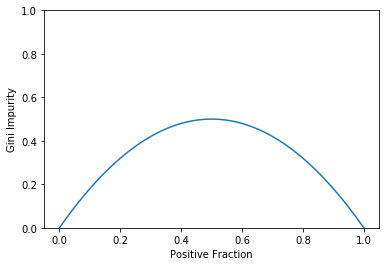

In [17]:
import matplotlib.pyplot as plt
import numpy as np 
# Fraction of positive class varies from 0 to 1:

pos_fraction = np.linspace(0.00, 1.00, 1000)
 
# Gini impurity is calculated as

gini = 1 - pos_fraction**2 - (1-pos_fraction)**2

# We plot the results:

plt.plot(pos_fraction,gini)
plt.ylim(0,1)
plt.xlabel('Positive Fraction')
plt.ylabel('Gini Impurity')
plt.show()

For binary cases, the highest impurity is achieved with positive fraction of 50%.

In [18]:
# We can define a function for Gini Impurity

def gini_impurity(labels):
    # If set is empty, it is pure
    if not labels:
        return 0
    # Count occurency of each label
    counts = np.unique(labels, return_counts= True)[1]
    fractions = counts / float(len(labels))
    return 1 - np.sum(fractions ** 2)

# Testing it
print(f'{gini_impurity([1,1,1,0,0]):.4f}')

print(f'{gini_impurity([1,1,1,1,0]):.4f}')


0.4800
0.3200


### Information Gain

Higher information gain implies better splitting..

Information gain is calculate by comparison of entropy before and after the splitting.

*Definition*: **Entropy** is a probabilistic measure of uncertainty. In a K-class dataset with $f_k$ denoting the fraction of each class in the entire dataset:

$$ Entropy = - \sum_{k=1}^K f_k * log_2 f_k $$

Lower entropy means a purer dataset, such that if the fraction of one of two classes is 1, then entropy is zero. 

<ipython-input-19-23b85a40c03d>:3: RuntimeWarning: divide by zero encountered in log2
  ent = - (pos_fraction * np.log2(pos_fraction) +
<ipython-input-19-23b85a40c03d>:3: RuntimeWarning: invalid value encountered in multiply
  ent = - (pos_fraction * np.log2(pos_fraction) +
<ipython-input-19-23b85a40c03d>:4: RuntimeWarning: divide by zero encountered in log2
  (1 - pos_fraction) * np.log2(1 - pos_fraction))
<ipython-input-19-23b85a40c03d>:4: RuntimeWarning: invalid value encountered in multiply
  (1 - pos_fraction) * np.log2(1 - pos_fraction))


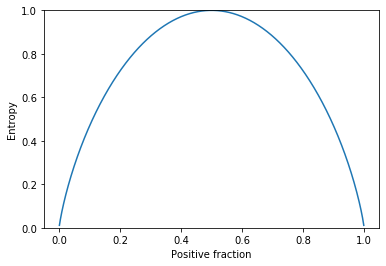

In [19]:
# Calculating entropy for different fractions fo positve classs
pos_fraction = np.linspace(0.00, 1.00, 1000)
ent = - (pos_fraction * np.log2(pos_fraction) +
(1 - pos_fraction) * np.log2(1 - pos_fraction))
plt.plot(pos_fraction, ent)
plt.xlabel('Positive fraction')
plt.ylabel('Entropy')
plt.ylim(0, 1)
plt.show()


In [20]:
# And now we can write the function
def entropy(labels):
    if not labels:
        return 0
    counts = np.unique(labels, return_counts=True)[1]
    fractions = counts / float(len(labels))
    return - np.sum(fractions * np.log2(fractions))

In [21]:
print(f'{entropy([1, 1, 0, 1, 0]):.4f}')
print(f'{entropy([1, 1, 0, 1, 0, 0]):.4f}')


0.9710
1.0000


- Splits are then based on information gain which is basically the entropy after the split and before.

- The entropy after the split is a weighted average (by sample) of the entropy of the split samples. 

The choice of Gini or Information Gain has generally little impact on the performance of trained tree. 

In [22]:
criterion_function = {'gini': gini_impurity,
                      'entropy': entropy}
def weighted_impurity(groups, criterion='gini'):
    """
    Calculate weighted impurity of children after a split
    @param groups: list of children, and a child consists a
    list of class labels
    @param criterion: metric to measure the quality of a split,
    'gini' for Gini Impurity or 'entropy' for
    Information Gain
    @return: float, weighted impurity
    """
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += len(group) / float(total) * criterion_function[criterion](group)
    return weighted_sum

In [23]:
# Example 
children_1 = [[1, 0, 1], [0, 1]]
children_2 = [[1, 1], [0, 0, 1]]
print(f"Entropy of #1 split:{weighted_impurity(children_1,'entropy'):.4f}")
print(f"Entropy of #2 split: {weighted_impurity(children_2,'entropy'):.4f}")


Entropy of #1 split:0.9510
Entropy of #2 split: 0.5510


## Implementing a decision tree from the scratch




In [4]:
# For computational reasons, we define gini impurity funtion with NumPy arrays

def gini_impurity_np(labels):
    # When the set is empty, it is also pure 
    if labels.size == 0:
        return 0
    # Count occurrencies of each label 
    counts = np.unique(labels, return_counts= True)[1]
    fractions = counts / float(len(labels))
    return 1- np.sum(fractions ** 2)

def entropy_np(labels):
    # When the set is empty, it is also pure
    if labels.size == 0:
        return 0
    counts = np.unique(labels, return_counts=True)[1]
    fractions = counts / float(len(labels))
    return - np.sum(fractions * np.log2(fractions))

def weighted_impurity(groups, criterion='gini'):
    """
    Calculate weighted impurity of children after a split
    @param groups: list of children, and a child consists a list
    of class labels
    @param criterion: metric to measure the quality of a split,
    'gini' for Gini Impurity or
    'entropy' for Information Gain
    @return: float, weighted impurity
    """
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += len(group) / float(total) * criterion_function_np[criterion](group)
    return weighted_sum

def split_node(X, y, index, value):
    """
    Split dataset X, y based on a feature and a value
    @param X: numpy.ndarray, dataset feature
    @param y: numpy.ndarray, dataset target
    @param index: int, index of the feature used for splitting
    @param value: value of the feature used for splitting
    @return: list, list, left and right child, a child is in
    the format of [X, y]
    """
    x_index = X[:, index]
    # if this feature is numerical
    if X[0, index].dtype.kind in ['i', 'f']:
        mask = x_index >= value
    # if this feature is categorical
    else:
        mask = x_index == value
        # split into left and right child
        left = [X[~mask, :], y[~mask]]
        right = [X[mask, :], y[mask]]
    return left, right

def get_best_split(X, y, criterion):
    """
    Obtain the best splitting point and resulting children for
    the dataset X, y
    @param X: numpy.ndarray, dataset feature
    @param y: numpy.ndarray, dataset target
    @param criterion: gini or entropy
    @return: dict {index: index of the feature, value: feature
    value, children: left and right children}
    """
    best_index, best_value, best_score, children = None, None, 1, None
    for index in range(len(X[0])):
        for value in np.sort(np.unique(X[:, index])):
            groups = split_node(X, y, index, value)
            impurity = weighted_impurity([groups[0][1], groups[1][1]], criterion)
            if impurity < best_score:
                best_index, best_value, best_score, children = index, value, impurity, groups
    return {'index': best_index, 'value': best_value,'children': children}

# When stopping criterion is met, the process stops at a node and the major label is assigned to left node.sum

def get_leaf(labels):
    # Obtain the leaf as the majority of the labels
    return np.bincount(labels).argmax()

# Lastly, we need a function that links all together

# - Assign leaf node is one of two childs is empty 
# - Assign lef node if reaches maximum depth allowed 
# - Assign leaf node if the node has not enough samples to a further split 
# - If none is met, continue splitting

def split(node, max_depth, min_size, depth, criterion):
    """
    Split children of a node to construct new nodes or assign
    them terminals
    @param node: dict, with children info
    @param max_depth: int, maximal depth of the tree
    @param min_size: int, minimal samples required to further
    split a child
    @param depth: int, current depth of the node
    @param criterion: gini or entropy
    """
    left, right = node['children']
    del (node['children'])
    if left[1].size == 0:
        node['right'] = get_leaf(right[1])
        return
    if right[1].size == 0:
        node['left'] = get_leaf(left[1])
        return
    # Check if the current depth exceeds the maximal depth
    if depth >= max_depth:
        node['left'], node['right'] = get_leaf(left[1]), get_leaf(right[1])
        return
    # Check if the left child has enough samples
    if left[1].size <= min_size:
        node['left'] = get_leaf(left[1])
    else:
        # It has enough samples, we further split it
        result = get_best_split(left[0], left[1], criterion)
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['left'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['left'] = get_leaf(result_left[1])
        else:
            node['left'] = result
            split(node['left'], max_depth, min_size, depth + 1, criterion)
    # Check if the right child has enough samples
    if right[1].size <= min_size:
        node['right'] = get_leaf(right[1])
    else:
        # It has enough samples, we further split it
        result = get_best_split(right[0], right[1], criterion)
        result_left, result_right = result['children']
        if result_left[1].size == 0:
            node['right'] = get_leaf(result_right[1])
        elif result_right[1].size == 0:
            node['right'] = get_leaf(result_left[1])
        else:
            node['right'] = result
            split(node['right'], max_depth, min_size, depth + 1, criterion)

# Entry point of construction

def train_tree(X_train, y_train, max_depth, min_size,criterion='gini'):
    """
    Construction of a tree starts here
    @param X_train: list of training samples (feature)
    @param y_train: list of training samples (target)
    @param max_depth: int, maximal depth of the tree
    @param min_size: int, minimal samples required to further
    split a child
    @param criterion: gini or entropy
    """
    X = np.array(X_train)
    y = np.array(y_train)
    root = get_best_split(X, y, criterion)
    split(root, max_depth, min_size, 1, criterion)
    return root

In [5]:
# Test it 
import numpy as np
criterion_function_np = {'gini': gini_impurity_np,'entropy': entropy_np}
X_train = [['tech', 'professional'],
            ['fashion', 'student'],
            ['fashion', 'professional'],
            ['sports', 'student'],
            ['tech', 'student'],
            ['tech', 'retired'],
            ['sports', 'professional']]
y_train = [1, 0, 0, 0, 1, 0, 1]
tree = train_tree(X_train, y_train, 2, 2)

In [3]:
print(tree)

{'index': 0, 'value': 'fashion', 'left': {'index': 1, 'value': 'professional', 'left': 0, 'right': 1}, 'right': 0}


### Implementing decision tree with scikit-learn



In [1]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz
X_train_n = [[6, 7],
            [2, 4],
            [7, 2],
            [3, 6],
            [4, 7],
            [5, 2],
            [1, 6],
            [2, 0],
            [6, 3],
            [4, 1]]
y_train_n = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
tree_sk = DecisionTreeClassifier(criterion='gini',max_depth=2, min_samples_split=2)
tree_sk.fit(X_train_n, y_train_n)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
export_graphviz(tree_sk, out_file='tree.dot',
                    feature_names=['X1', 'X2'], impurity=False,
                    filled=True, class_names=['0', '1'])

The command above has generated a .dot file containing the tree visualization. 

To visualize it, you can open the "tree.dot" file and run ctrl + shift + v (if you have installed https://marketplace.visualstudio.com/items?itemName=joaompinto.vscode-graphviz)


## Ensembling decision trees - random forest

- If one gets random samples from original dataset with replacement, each set fit an individual classification model and results are combined thorugh **majority vote** rule of decision, we can say she is using the technique of **bagging** (**booststrap aggregating**). 

- Generally speaking bagging reduces high variance of a tree and generally performs better than a single tree. However when few features are strong indicators, individual trees are highly based on these features, making trees highly correlated, reducing the benefits of aggregating multiple trees. To circumvent this problem, random forest also randomly select a subset of features when searching for the best split in each node. 

### Implementing random forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,
                                       criterion='gini', min_samples_split=30,
                                       n_jobs=-1)

Main hyperparameters:

- max_depth: The maximum "depth" of an individual tree in terms of nodes (overfit if too deep and underfit if too shallow);

- min_samples_split: The minimum number of samples required for a split (overfit if too small and underfit if too large);

- max_features: Number o festures to consider for each best splitting point search. Typically square root of m number of total features is used. 
In scikit-learn this can be specified as `max_features = "sqrt"`;

- n_estimators: The number of estimated trees (usually 100, 200, 500);

To fine tune the hyperparameters we use the following:

In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [3, 10, None]}
grid_search = GridSearchCV(random_forest, parameters,n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train_n, y_train_n)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=30,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random

In [22]:
print(grid_search.best_params_)

{'max_depth': 3}


## Ensembling decion trees - gradient boosted trees

**Boosting** is another ensemble technique, which instead of combining multiple learners in parallel, each tree is longer trained separately.

In one of the boosting methods, called **Gradient boosted trees (BGT)** trees are trained successvely aiing to correct errors made by previous one. 

To implement it, you can use the XGBoost package (pip install xgboost)

# Chapter 7: Predicting Stock Prices with Regression Algorithms